In [1]:
import numpy as np
import pandas as pd

import random
import warnings

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

#分類問題
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [3]:
X.shape

(100, 2)

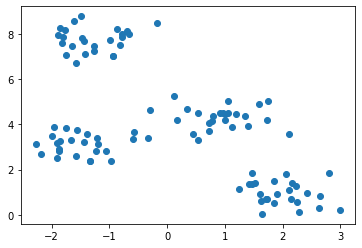

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = {}
        self.sse = {}
        self.centroids_dict = {}
        
    def __initial_centroids(self, X):
        for i in range(self.n_clusters):
            self.centroids[i] = random.choice(X)

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        for init_idx in range(self.n_init):
            self.sse[init_idx] = 0.0
            self.centroids_dict[init_idx] = 0.0
            
        for init_idx in range(self.n_init):            
            self.__initial_centroids(X)

            for epoch in range(self.max_iter):
                
                self.classifications = {}
                for i in range(self.n_clusters):
                    self.classifications[i] = []
                    
                temp_sse = 0.0
                for feature_set in X:
                    eucledian_distances = [np.linalg.norm(feature_set - self.centroids[centroid]) for centroid in self.centroids]
                    temp_sse += min((np.array(eucledian_distances)**2))
                    classification = eucledian_distances.index(min(eucledian_distances))
                    self.classifications[classification].append(feature_set)

                for classification in self.classifications:
                    with warnings.catch_warnings(): #RuntimeWarning: Mean of empty slice　警告回避
                        warnings.simplefilter("ignore", category=RuntimeWarning)
                        self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                                   
                if self.sse[init_idx] == 0: # 初回：辞書の値が0の場合
                    self.sse[init_idx] = temp_sse
                    self.centroids_dict[init_idx] = dict(self.centroids)
                elif self.sse[init_idx] >= temp_sse: # n_init別にエポック毎の最小SSEを辞書に保存
                    self.sse[init_idx] = temp_sse
                    self.centroids_dict[init_idx] = dict(self.centroids)
                    
                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力
                    print()

        self.best_centroids = self.centroids_dict[min(self.sse)]
        self.best_sse = self.sse.get(min(self.sse))
    
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        classification_pred = []
        for feature_set in X:
            distances = [np.linalg.norm(feature_set - self.best_centroids[centroid]) for centroid in self.best_centroids]
            classification = distances.index(min(distances))
            classification_pred.append(classification)
            
        return np.array(classification_pred)

In [6]:
model = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, tol=0.0001)
model.fit(X)
pred = model.predict(X)

In [7]:
pred

array([2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 0, 0, 3, 2, 1,
       0, 3, 2, 0, 0, 2, 3, 3, 3, 1, 3, 3, 0, 2, 1, 3, 1, 0, 2, 0, 1, 0,
       0, 1, 3, 0, 2, 2, 2, 3, 0, 0, 0, 1, 1, 3, 3, 1, 1, 3, 3, 2, 3, 1,
       0, 0, 3, 2, 1, 3, 2, 1, 2, 2, 0, 0, 3, 3, 3, 1, 0, 2, 3, 0, 3, 3,
       2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

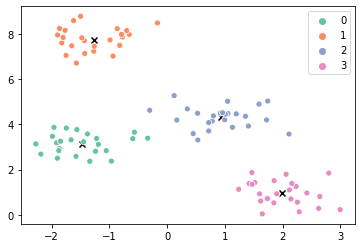

In [8]:
for centroid in model.best_centroids:
    plt.scatter(model.best_centroids[centroid][0], model.best_centroids[centroid][1], marker="x", color="k")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred, palette="Set2")
plt.show

### 【問題1】中心点の初期値を決める
入力されたデータから 
K
 個の中心点 
$\mu_{1}$
 から 
$\mu_{k}$
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 
$X_{n}$
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。



### 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する 
$r_{nk}$
 と 
$\mu_{k}$
 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE = \sum_{n=1}^N \sum_{i=1}^K r_{nk} ||X_{n} - \mu_{k}||^2
$$


n
 : データ点のインデックス


k
 : クラスタのインデックス


$X_{n}$
 : 
n
番目のデータ点


$\mu_{k}$
 : 
k
番目の中心点


$r_{nk}$
 : データ点
X
n
がクラスタ
k
に所属していたら1、そうでなければ0

### 【問題3】クラスタへの割り当て
全てのデータ点 
$X_{n}$
 を最も近い中心点 
$\mu_{k}$
 に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。

$$
||q - p|| = \sqrt{(q - p) ⋅ (q - p)}
$$

NumPyにはこの関数が`np.linalg.norm`として用意されているため使用してください。


[numpy.linalg.norm — NumPy v1.17 Manual](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)


中心点 
μ
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

### 【問題4】中心点の移動
中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て 
$r_{nk}$
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

### 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 $\mu_{k}$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

### 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
μ
k
 を保持しておきます。

### 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 
X
n
 と学習で決まった中心点 
μ
k
 に対し、 
S
S
E
 を最小化する 
r
n
k
 を選ぶ。

具体的には次のことです。


データ点 
X
n
 を最も近い 
μ
k
 に割り当てる。

### 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [9]:
sse_list = []
for i in range(1, 11):
    model = ScratchKMeans(n_clusters=i, n_init=10, max_iter=100, tol=0.0001)
    model.fit(X)
    sse_list.append(model.best_sse)
print(sse_list)

[870.2611797855423, 351.4837286512545, 139.1709777203381, 48.633783207064035, 43.84766382804279, 40.443332886451635, 36.53835560590123, 35.24818767807198, 32.04590137650883, 32.851863166939694]


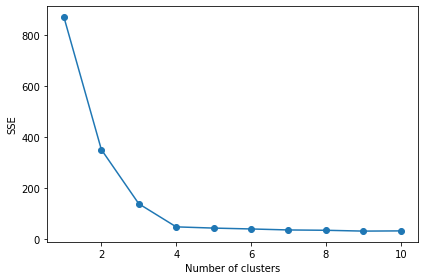

In [10]:
plt.plot(range(1, 11), sse_list, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

### 【問題9】（アドバンス課題）シルエット図
k
 を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。


Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


`silhouette_vals` : shape(n_samples,)のndarray、各データ点のシルエット係数


`silhouette_avg` : float、シルエット係数の平均値


`y_km` : shape(n_samples,)のndarray、各データ点のクラスタラベル名


`cluster_labels` : list、クラスタのラベル名のリスト


`n_clusters` : int、クラスタ数


n
 番目のデータ点に対するシルエット係数 
$s_{n}$
 は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_{n}= \frac{b_{n} - a_{n} }{max(b_{n},a_{n})}
$$

$a_{n}$
 : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。


$b_{n}$
 : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。


乖離度 
b
 が大きく、凝集度 
a
 が小さい時が理想的であり、シルエット係数 
s
 は1に近くなります。

__問いてません。scikit-learnのシルエット図を確認する。__

In [11]:
model = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, tol=0.0001)
model.fit(X)
pred = model.predict(X)
y_km = pred

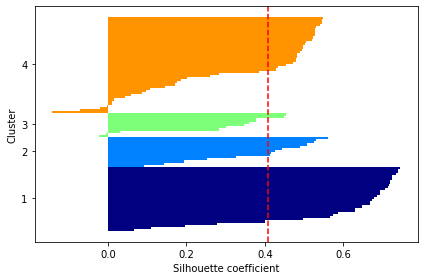

In [12]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

3.クラスタ分析

卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。


次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [13]:
df = pd.read_csv('Wholesale customers data.csv')
df = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [14]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [15]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

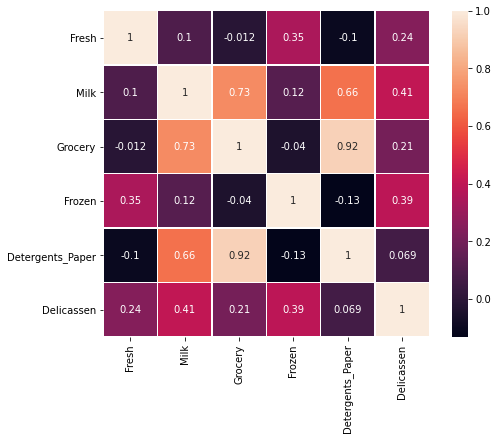

In [16]:
df_corr = df.corr()
plt.figure(figsize=(8, 6))  
sns.heatmap(df_corr, square=True, annot=True, linewidths=.5)

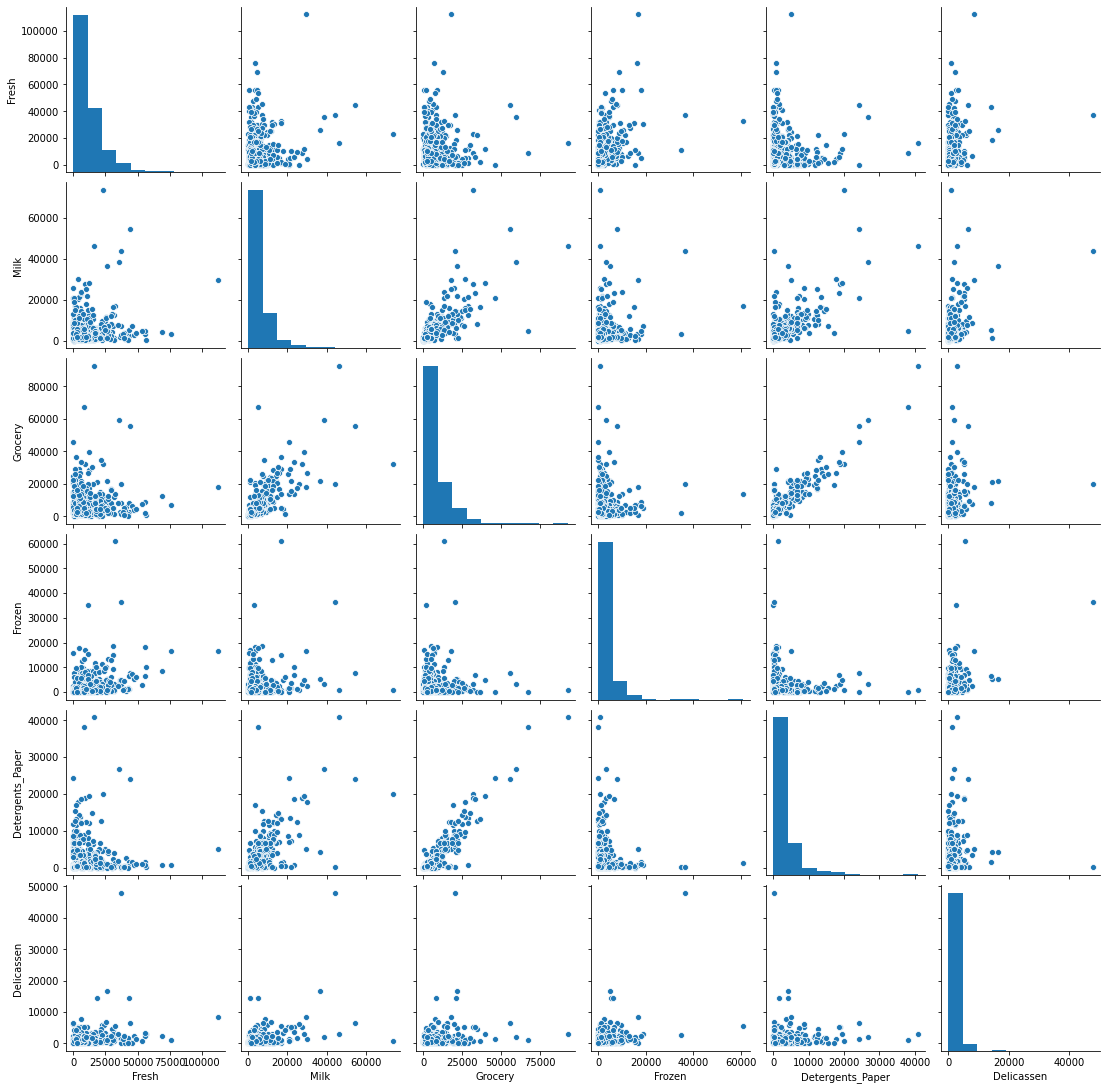

In [17]:
sns.pairplot(df)

In [18]:
data = df.values
data[:5]

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       [13265,  1196,  4221,  6404,   507,  1788],
       [22615,  5410,  7198,  3915,  1777,  5185]])

- scratch KMeans

In [19]:
sse_list = []
for i in range(1, 11):
    model = ScratchKMeans(n_clusters=i, n_init=10, max_iter=100, tol=0.0001)
    model.fit(data)
    sse_list.append(model.best_sse)
print(sse_list)

[157595857165.60883, 119555436773.62297, 80342166920.9407, 64855545528.21104, 53771230142.78358, 47789010125.81939, 41922735726.058174, 39387884916.491104, 33894345656.529297, 38018117009.21802]


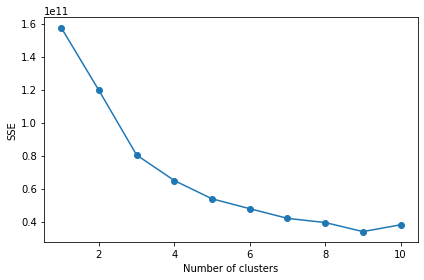

In [20]:
plt.plot(range(1, 11), sse_list, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

- scikit-learn KMeans

In [21]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, tol=1e-04, random_state=0)
    km.fit(data)
    distortions.append(km.inertia_)

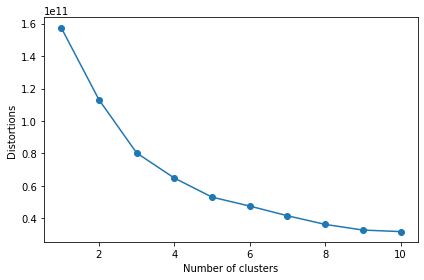

In [22]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.tight_layout()
plt.show()

- PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

In [24]:
data_pca.shape

(440, 2)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


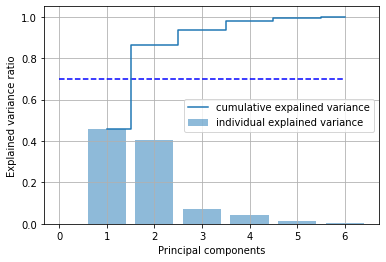

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [26]:
sse_list = []
for i in range(1, 11):
    model = ScratchKMeans(n_clusters=i, n_init=10, max_iter=100, tol=0.0001)
    model.fit(data_pca)
    sse_list.append(model.best_sse)
print(sse_list)

[136286672801.69916, 98252379616.71616, 59085149481.990555, 46180875441.884125, 32050894205.465687, 27412844715.508095, 21760570662.547962, 20340035382.46481, 18123926957.828014, 16136765290.243914]


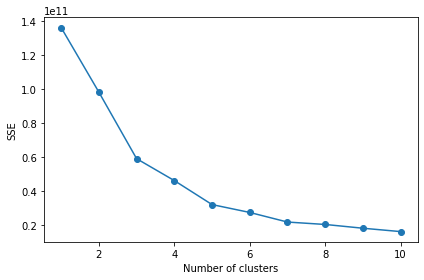

In [27]:
plt.plot(range(1, 11), sse_list, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

- クラスター数：3

In [28]:
model = ScratchKMeans(n_clusters=3, n_init=10, max_iter=100, tol=0.0001)
model.fit(data_pca)
pred = model.predict(data_pca)

In [29]:
df['Cluster'] = pred
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,1


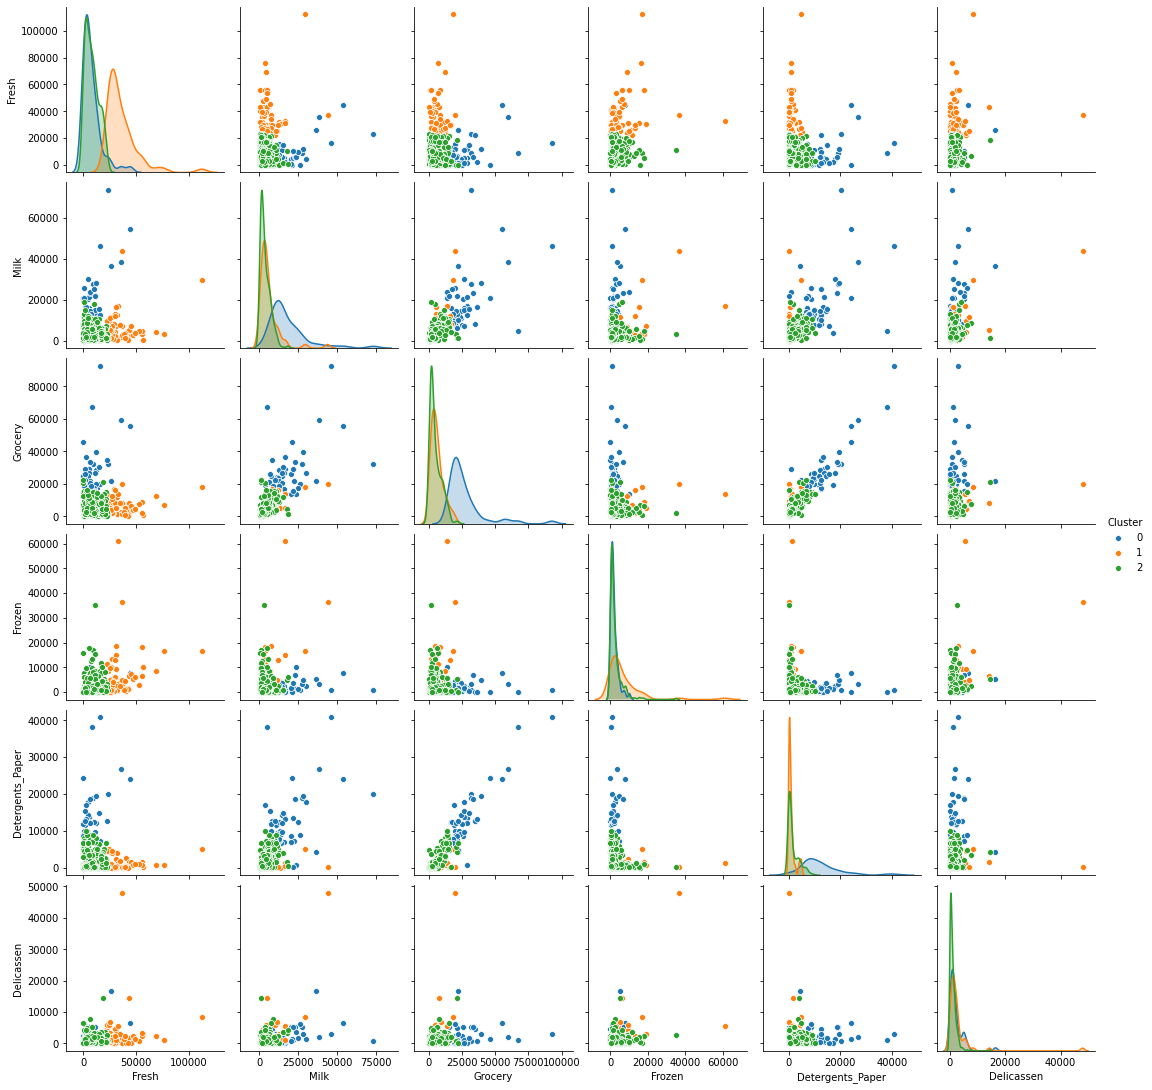

In [30]:
sns.pairplot(df, hue="Cluster")

- シルエット図

In [31]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
def silhouette_plot(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]

    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

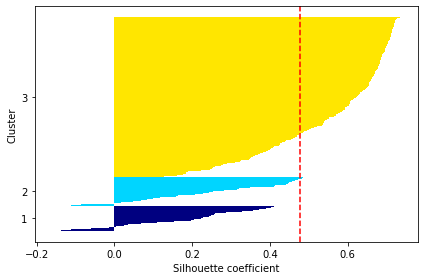

In [32]:
X = data
y_km = pred
silhouette_plot(X, y_km)

- クラスター数：2

In [33]:
model = ScratchKMeans(n_clusters=2, n_init=10, max_iter=100, tol=0.0001)
model.fit(data_pca)
pred = model.predict(data_pca)

In [34]:
df['Cluster'] = pred
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


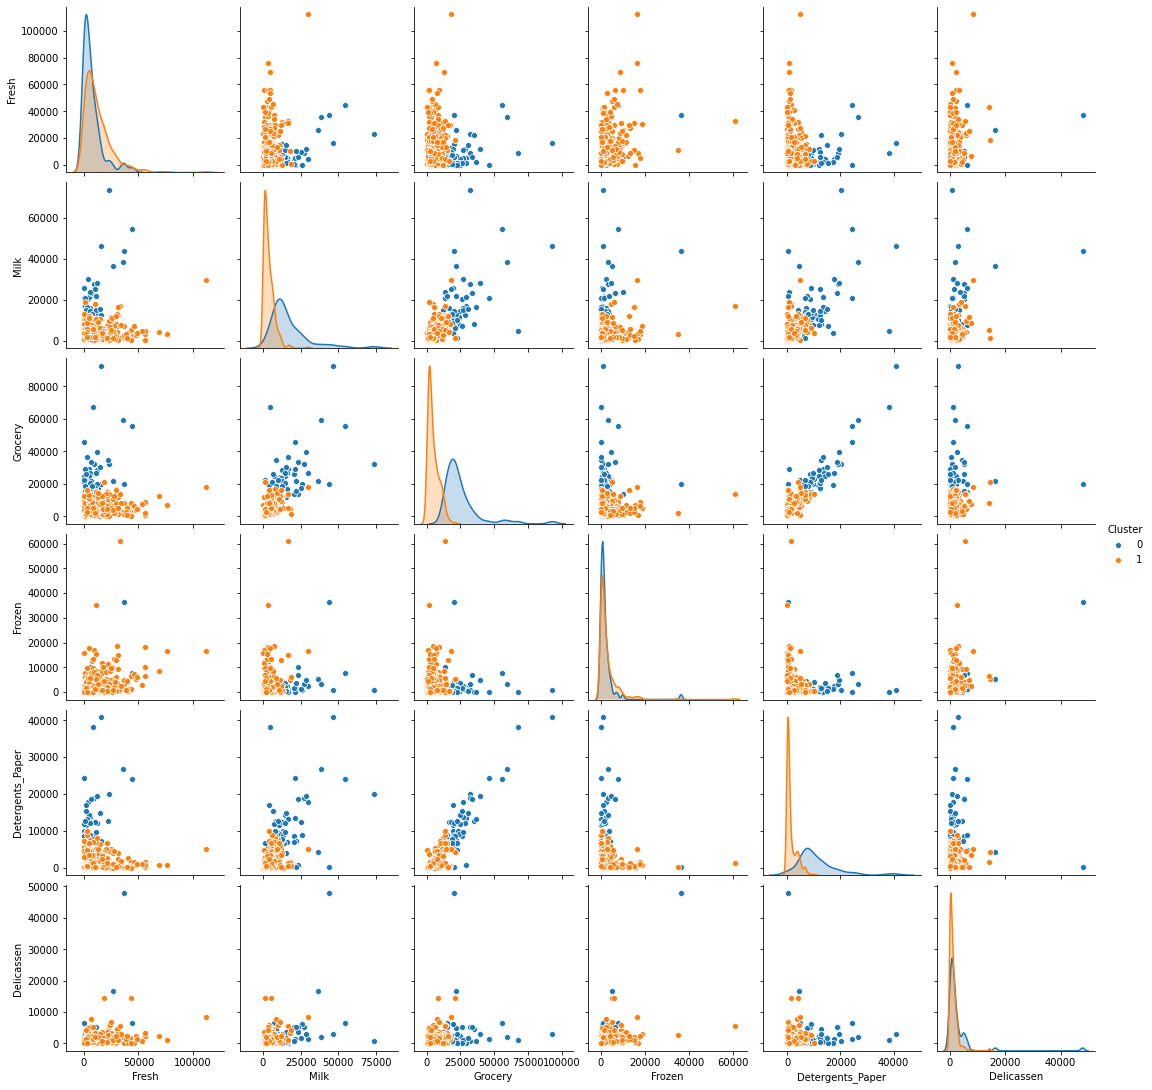

In [35]:
sns.pairplot(df, hue="Cluster")

- シルエット図

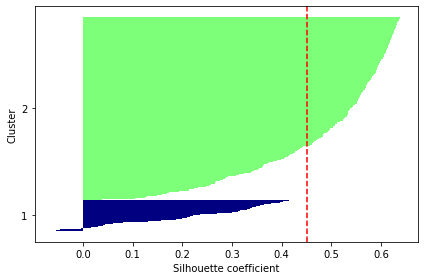

In [36]:
X = data
y_km = pred
silhouette_plot(X, y_km)

- クラスター数：7

In [37]:
model = ScratchKMeans(n_clusters=7, n_init=10, max_iter=100, tol=0.0001)
model.fit(data_pca)
pred = model.predict(data_pca)

In [38]:
df['Cluster'] = pred
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,5
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,5
4,22615,5410,7198,3915,1777,5185,5


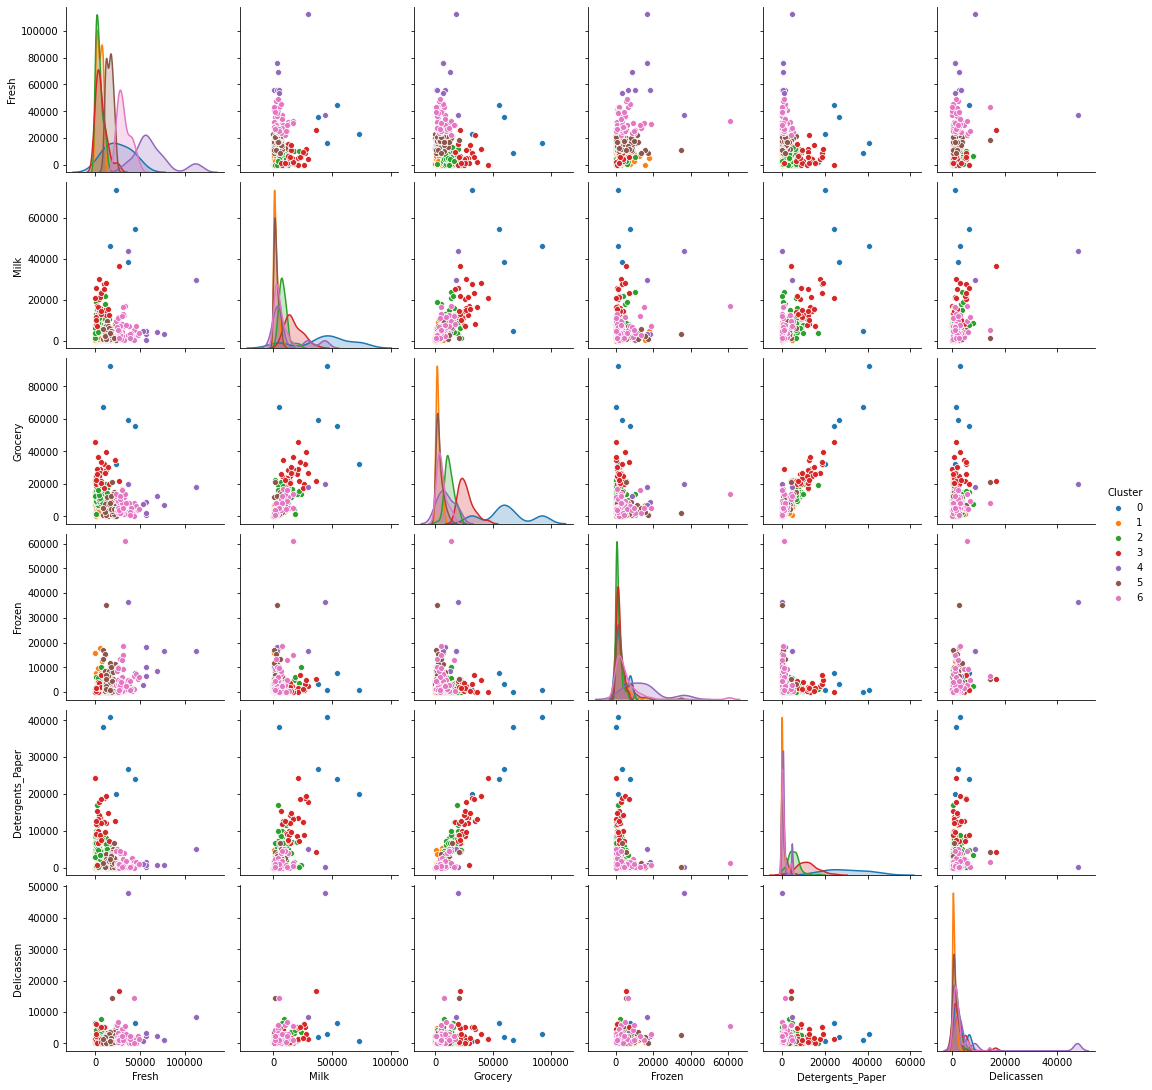

In [39]:
sns.pairplot(df, hue="Cluster")

- シルエット図

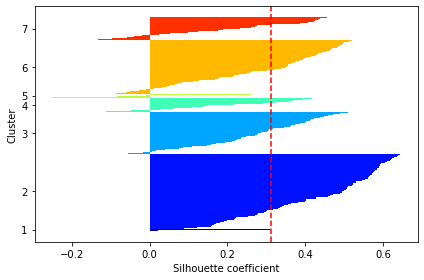

In [40]:
X = data
y_km = pred
silhouette_plot(X, y_km)

- クラスター数：4

In [41]:
model = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, tol=0.0001)
model.fit(data_pca)
pred = model.predict(data_pca)

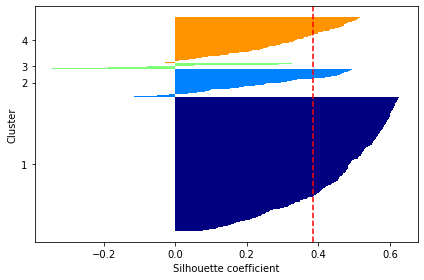

In [42]:
X = data
y_km = pred
silhouette_plot(X, y_km)

### 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

＜説明＞

最適だと思われるクラスタ数は、2〜3だと考えられる。

ペアプロットによる観察から、データは0付近に連続的に密集しており、
明らかな集団を構成していない。

主成分分析(#1)では、2次元で累計説明分散の86%、３次元で累計説明分散の94%を構成している。

4次元以上の多次元な特徴量から複雑な説明を行うより、
2〜3の特徴量を洗濯した上で単純な関係を説明する方が良いと考える。

#1\
主成分分析では、分散(ばらつき)が大きいところ(主成分)を見つける。\
分散が大きいところに着目する事で、よりデータが識別し易くなる。\
データの分散が少ない部分は、データに共通するパターンであり、あまり意味をなさない。\
データの分散が大きいところを見る事でデータの関係性を判断する事ができ、多次元特徴量の可視化に役立つ。

### 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

In [43]:
df_all = pd.read_csv('Wholesale customers data.csv')

In [44]:
df_all.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


__Attribute Information:__

1) FRESH: annual spending (m.u.) on fresh products (Continuous)

2) MILK: annual spending (m.u.) on milk products (Continuous)

3) GROCERY: annual spending (m.u.)on grocery products (Continuous)

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)

7) `CHANNEL`: customersâ€™ Channel - __Horeca__ (Hotel/Restaurant/CafÃ©) or __Retail__ channel (Nominal)

8) `REGION`: customersâ€™ Region â€“ __Lisnon__, __Oporto__ or __Other__ (Nominal)

CHANNEL:
1. Hoterica
2. Retail

REGION:
1. Lisbon
2. Oporto
3. Other

ポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータであり、\
顧客がどのようなチャネル(ホテル、小売)でどの地域(リスボン、ポルト、その他)に属するかは既知である。

一方、クラスタは、正解ラベルが与えられておらず、特徴量から分析により隠れた構造・集団を見出す必要がある。

In [45]:
df_all['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [46]:
df_all['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

### 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


《ヒント》


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasの`groupby`が便利です。


[pandas.DataFrame.groupby — pandas 0.23.4 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [47]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.920455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,1.921119
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,1.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,2.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,5.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,6.000000


- GroceryとDetergents_Paper
> 1. 強い正の相関性(0.92)がある。
> 2. 小売：Groceryの購入金額が増えると、Detergents_Paperの購入金額も増える。
> 3. ホテル：小売と比較すると、関係性が弱い。

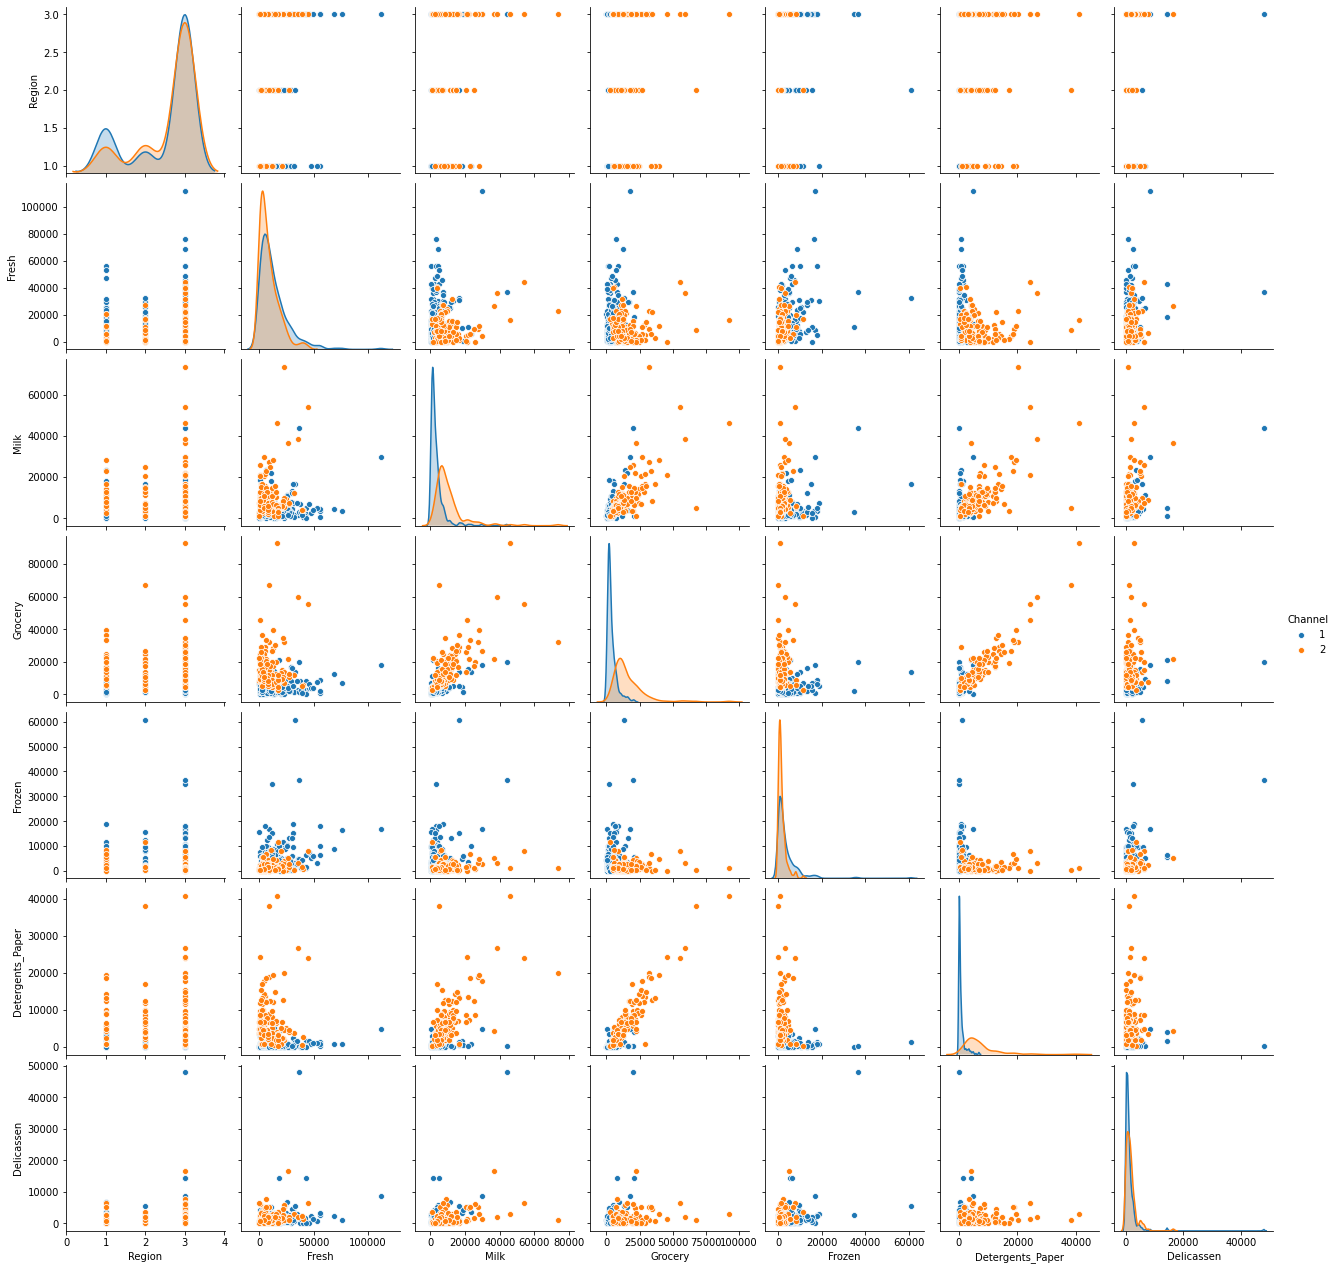

In [48]:
sns.pairplot(df_all, hue="Channel")

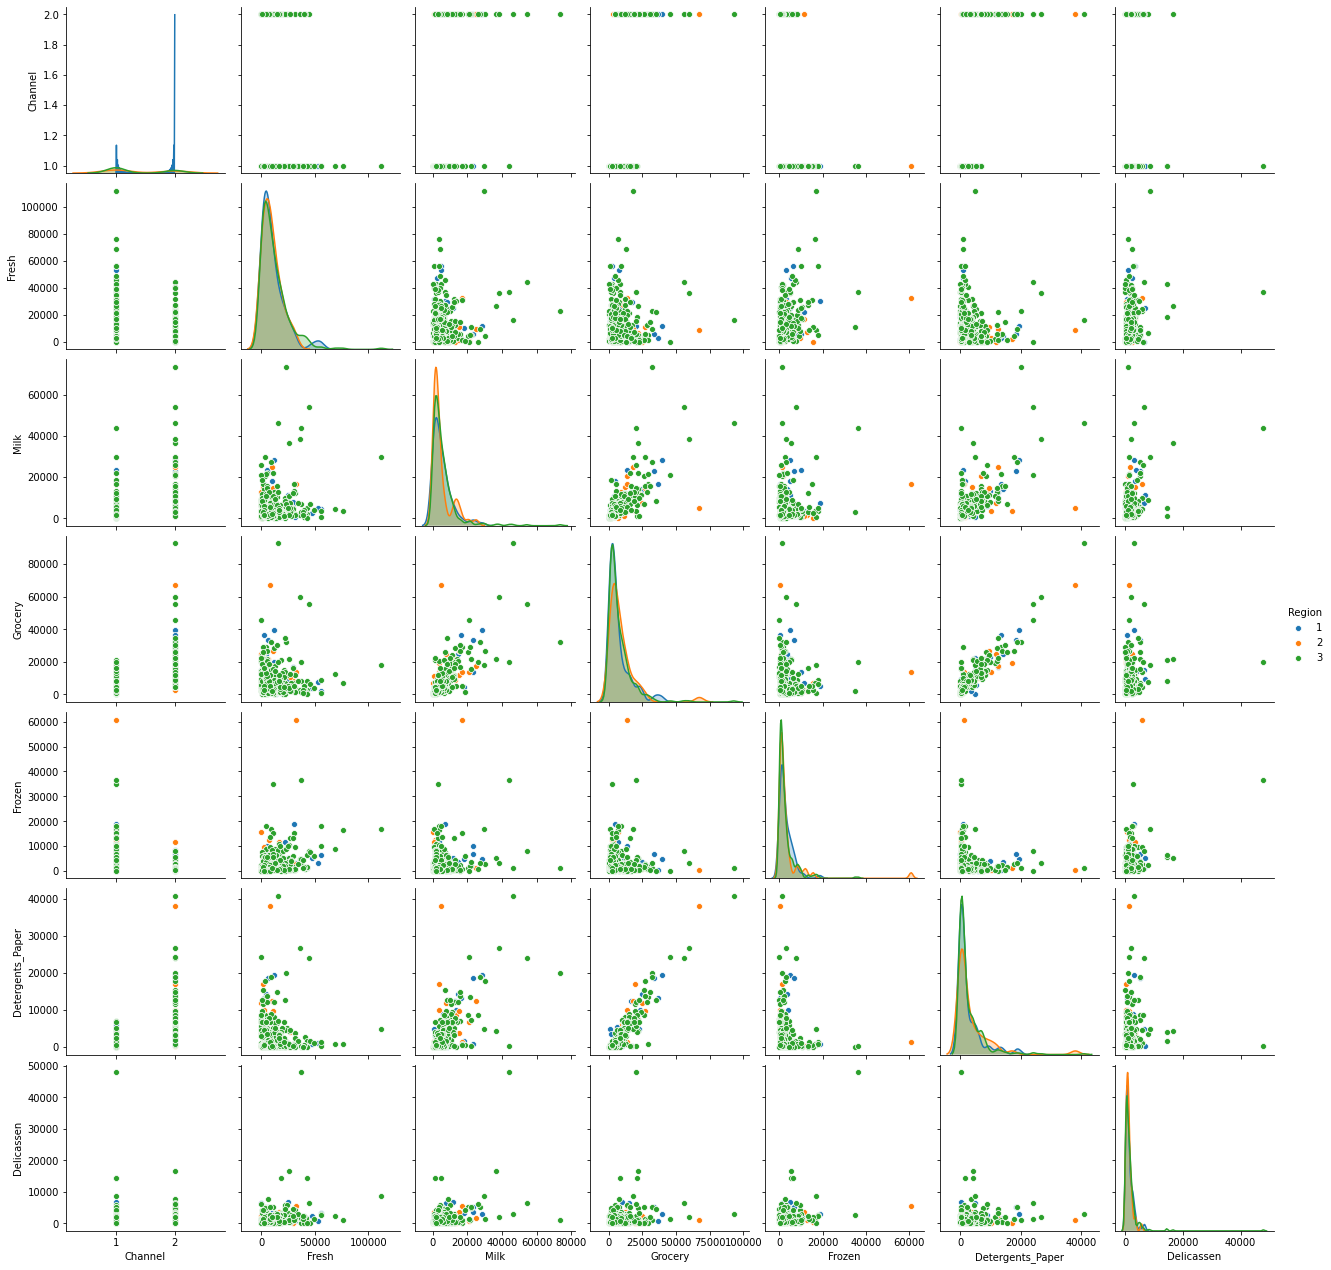

In [49]:
sns.pairplot(df_all, hue="Region")

- 金額の合計列(Total)を作成

In [50]:
df_all['Total'] = df_all[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum(axis=1)

In [51]:
df_all.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [52]:
df_all[['Region','Channel','Total']].groupby(['Region','Channel']).count()

Total
Region Channel       
1      1           59
       2           18
2      1           28
       2           19
3      1          211
       2          105

- 取引先件数：3その他地域の取引先件数が一番大きい。

- クラスタの個数を3でKMeanクラスタリングを実施

In [53]:
model = ScratchKMeans(n_clusters=3, n_init=10, max_iter=100, tol=0.0001)
model.fit(data_pca)
pred = model.predict(data_pca)
df_all['Cluster'] = pred
df_all.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
0,2,3,12669,9656,7561,214,2674,1338,34112,2
1,2,3,7057,9810,9568,1762,3293,1776,33266,2
2,2,3,6353,8808,7684,2405,3516,7844,36610,2
3,1,3,13265,1196,4221,6404,507,1788,27381,2
4,2,3,22615,5410,7198,3915,1777,5185,46100,0


- 下図クラスタリングのFresh列について
> Fresh列の購入金額が20,000ユーロを超えて増加すると、Milk、Grocery、Frozen、Detergents_Paperの購入金額が抑えられる傾向にある。\
> その反対に、Milk、Grocery、Frozen、Detergents_Paperの購入金額が増えると、Freshの購入金額が抑えられる傾向にある。

- クラスタリングについて
> ペアプロットした特徴量の目視だけでは、データが0付近(左下)に密集しており、クラスタ化されるのか把握できない。\
> クラスタリングを行う事によって、人間にとって意味のあるクラスタに分類されている可能性がある。一方で、人間が都合の良いようにクラスタを解釈してしまう可能性もある。\
> ビジネスの課題などの問題提起としては、クラスタリングを行う事に意味があるものと考える。

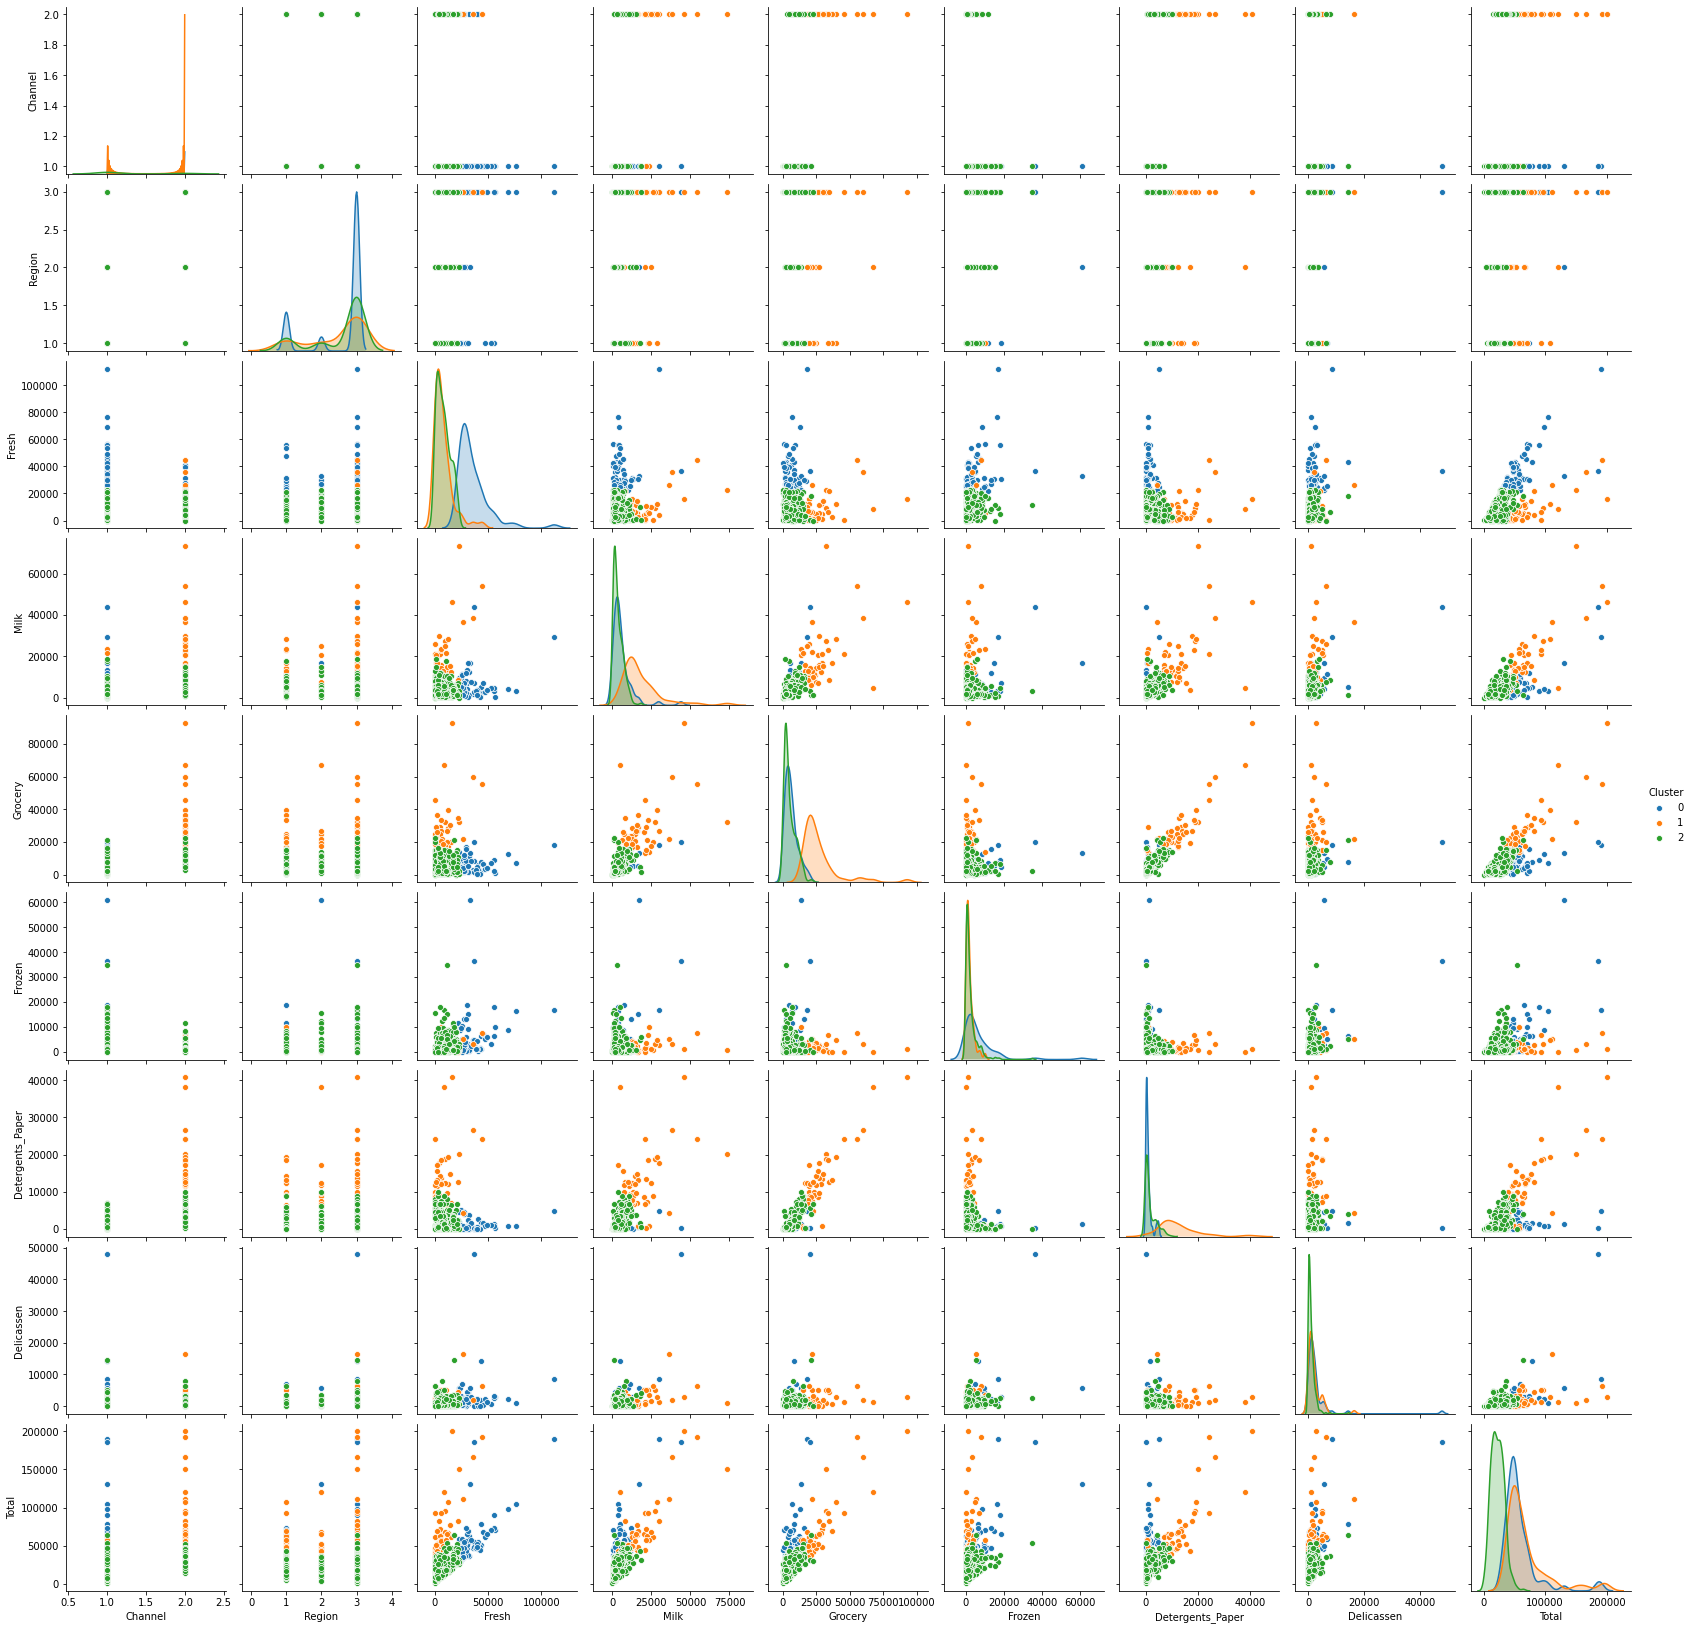

In [54]:
sns.pairplot(df_all, hue="Cluster")

- 対数変換をした特徴量に対してクラスタリングをするとどうなるか確認する

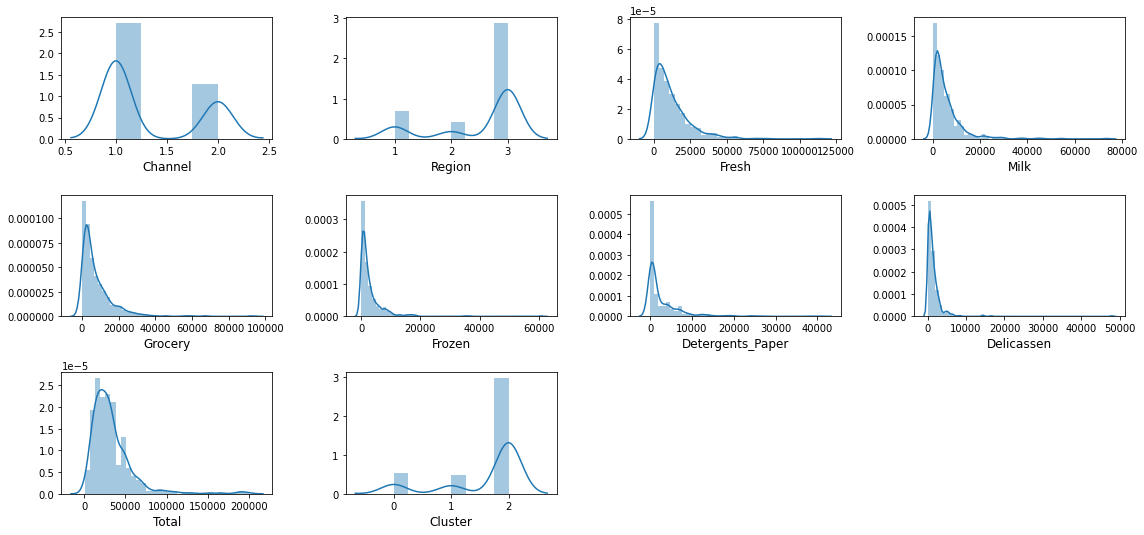

In [55]:
#  SUBPLOTS - FOR Loop
rowCnt = 5
colCnt = 4
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(16,12))
for column in df_all.columns:
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(column, fontsize=12)
    sns.distplot(df_all[column])
    subCnt = subCnt + 1

plt.tight_layout()
plt.show()

In [56]:
for column in df_all.columns:
    print('{:18}'.format(column), 
          'Skewness: {:05.2f}'.format(df_all[column].skew()), 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_all[column].kurt()),
          '   ' ,
          'Min Value: {:06.2f}'.format(df_all[column].min())
         )

Channel            Skewness: 00.76     Kurtosis: -01.43     Min Value: 001.00
Region             Skewness: -1.28     Kurtosis: -00.10     Min Value: 001.00
Fresh              Skewness: 02.56     Kurtosis: 011.54     Min Value: 003.00
Milk               Skewness: 04.05     Kurtosis: 024.67     Min Value: 055.00
Grocery            Skewness: 03.59     Kurtosis: 020.91     Min Value: 003.00
Frozen             Skewness: 05.91     Kurtosis: 054.69     Min Value: 025.00
Detergents_Paper   Skewness: 03.63     Kurtosis: 019.01     Min Value: 003.00
Delicassen         Skewness: 11.15     Kurtosis: 170.69     Min Value: 003.00
Total              Skewness: 03.03     Kurtosis: 013.54     Min Value: 904.00
Cluster            Skewness: -1.51     Kurtosis: 000.65     Min Value: 000.00


In [57]:
log_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Total']

for column in log_columns:
    df_all[column + '_Log'] = df_all[column].apply(np.log)

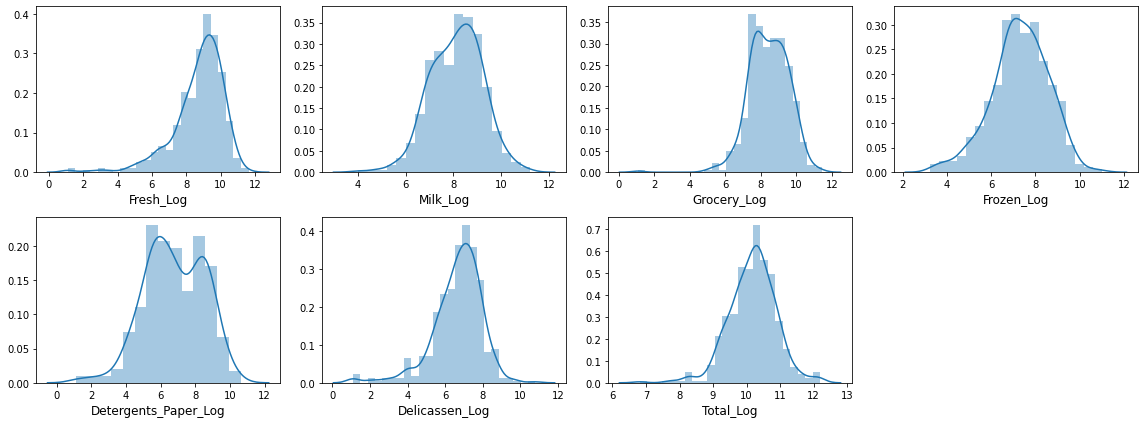

In [58]:
#  SUBPLOTS - FOR Loop
rowCnt = 2
colCnt = 4
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(16, 6))

for column in log_columns:
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel((column + '_Log'), fontsize=12)
    sns.distplot(df_all[(column + '_Log')])
    subCnt = subCnt + 1

plt.tight_layout()
plt.show()

In [59]:
for column in df_all.columns:
    print('{:24}'.format(column), 
          'Skewness: {:05.2f}'.format(df_all[column].skew()), 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_all[column].kurt()),
          '   ' ,
          'Min Value: {:06.2f}'.format(df_all[column].min())
         )

Channel                  Skewness: 00.76     Kurtosis: -01.43     Min Value: 001.00
Region                   Skewness: -1.28     Kurtosis: -00.10     Min Value: 001.00
Fresh                    Skewness: 02.56     Kurtosis: 011.54     Min Value: 003.00
Milk                     Skewness: 04.05     Kurtosis: 024.67     Min Value: 055.00
Grocery                  Skewness: 03.59     Kurtosis: 020.91     Min Value: 003.00
Frozen                   Skewness: 05.91     Kurtosis: 054.69     Min Value: 025.00
Detergents_Paper         Skewness: 03.63     Kurtosis: 019.01     Min Value: 003.00
Delicassen               Skewness: 11.15     Kurtosis: 170.69     Min Value: 003.00
Total                    Skewness: 03.03     Kurtosis: 013.54     Min Value: 904.00
Cluster                  Skewness: -1.51     Kurtosis: 000.65     Min Value: 000.00
Fresh_Log                Skewness: -1.63     Kurtosis: 004.44     Min Value: 001.10
Milk_Log                 Skewness: -0.23     Kurtosis: 000.22     Min Value:

In [60]:
delete_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen',
                  'Detergents_Paper', 'Delicassen', 'Total']

for column in delete_columns:
    df_all.drop(column, axis=1, inplace=True)

In [61]:
df_all.head()

,Channel,Region,Cluster,Fresh_Log,Milk_Log,Grocery_Log,Frozen_Log,Detergents_Paper_Log,Delicassen_Log,Total_Log
0,2,3,2,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,10.437405
1,2,3,2,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,10.412291
2,2,3,2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,10.508077
3,1,3,2,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,10.217605
4,2,3,0,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,10.738568


In [62]:
cluster_columns = ['Fresh_Log', 'Milk_Log', 'Grocery_Log', 'Frozen_Log',
                   'Detergents_Paper_Log', 'Delicassen_Log', 'Total_Log']

X = df_all[cluster_columns].values

In [63]:
sse_list = []
for i in range(1, 11):
    model = ScratchKMeans(n_clusters=i, n_init=10, max_iter=100, tol=0.0001)
    model.fit(X)
    sse_list.append(model.best_sse)
print(sse_list)

[5018.215363704595, 3494.368675902382, 2952.794617099569, 2632.206108140754, 2415.6258799700586, 2256.0407527372504, 2092.1483092872236, 1943.7375780075906, 1889.1474042026293, 1764.7238967506523]


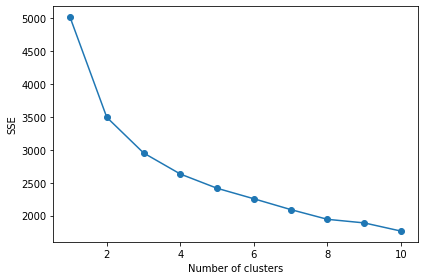

In [64]:
plt.plot(range(1, 11), sse_list, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

In [65]:
model = ScratchKMeans(n_clusters=6, n_init=10, max_iter=100, tol=0.0001)
model.fit(X)
pred = model.predict(X)
df_all['Cluster_Log'] = pred
df_all.head() 

,Channel,Region,Cluster,Fresh_Log,Milk_Log,Grocery_Log,Frozen_Log,Detergents_Paper_Log,Delicassen_Log,Total_Log,Cluster_Log
0,2,3,2,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,10.437405,5
1,2,3,2,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,10.412291,2
2,2,3,2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,10.508077,2
3,1,3,2,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,10.217605,4
4,2,3,0,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,10.738568,4


In [66]:
plot_columns = ['Fresh_Log', 'Milk_Log', 'Grocery_Log', 'Frozen_Log',
                'Detergents_Paper_Log', 'Delicassen_Log', 'Total_Log', 'Cluster_Log']

df_plot = df_all[plot_columns]

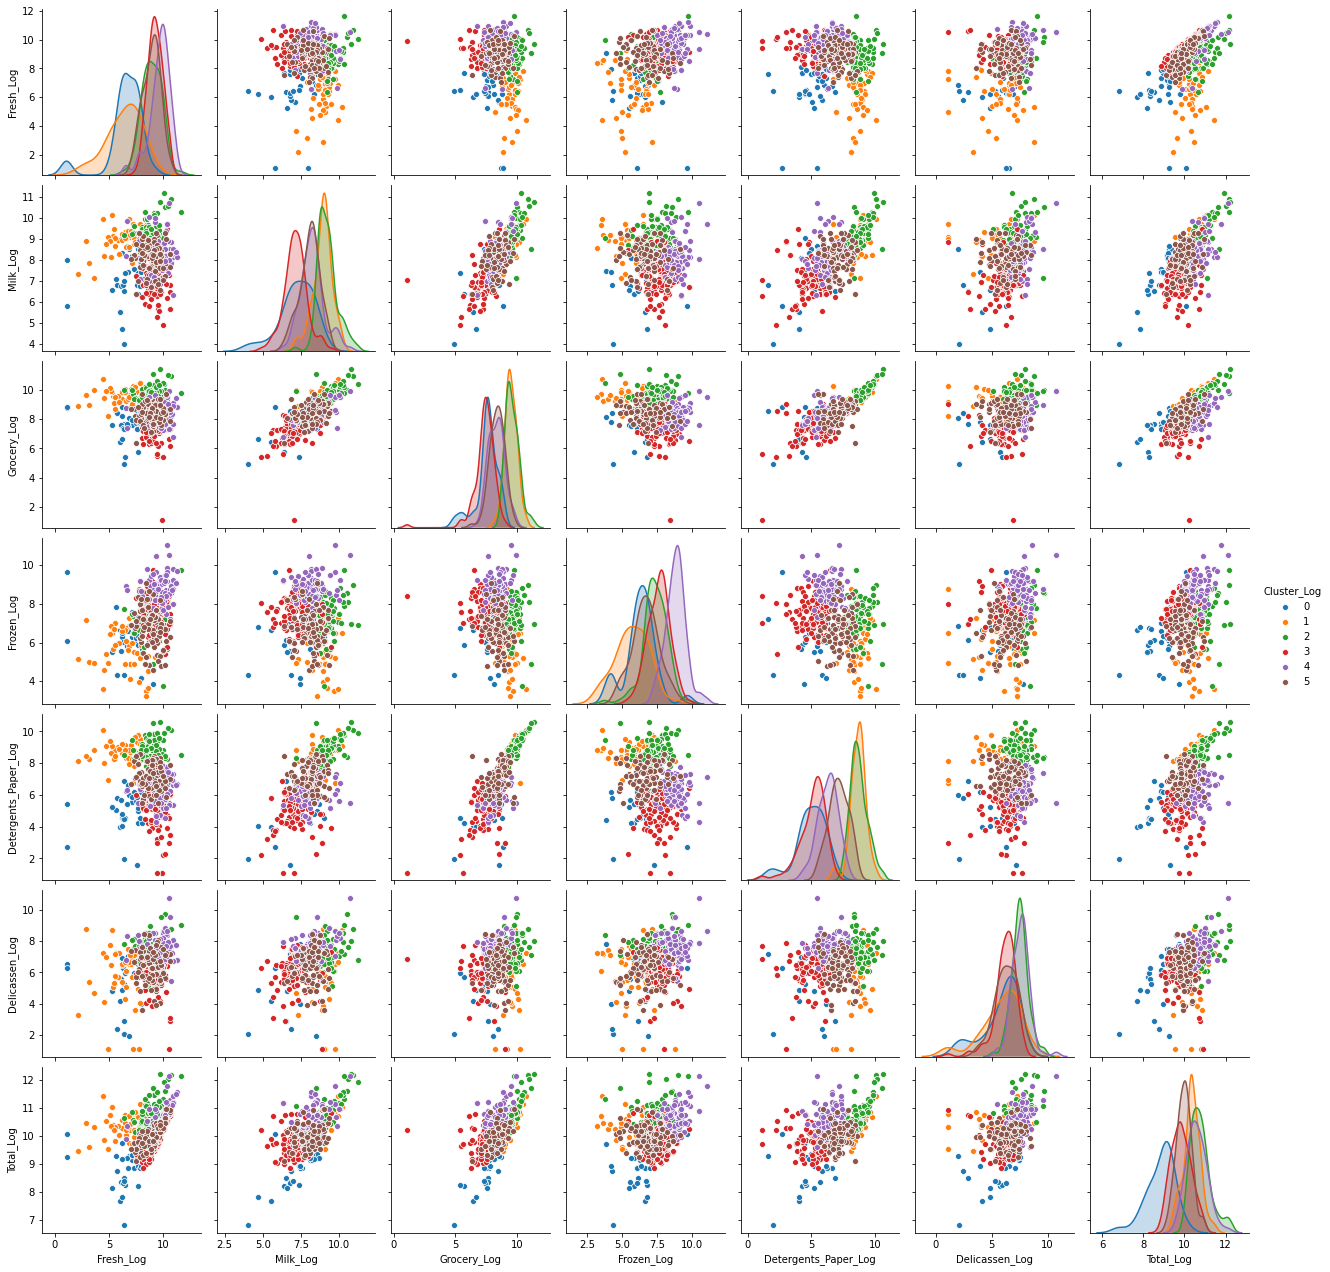

In [67]:
sns.pairplot(df_plot, hue="Cluster_Log")

- クラスタリングにおいて、対数変換は意味を成さないものと考える。\
　対数変換は、回帰分析等において、正しい仮定のもとでデータを変換した上で、予測・説明を行う。

- 対数変化した上記の図と、元々の特徴量との関係性が説明できない。

- __対数変換した特徴量に対してクラスタリングを行う事は意味がありますでしょうか？　知見をお持ちでしたらご教示ください。__

> まず、クラスタリングの目的として、何かにフィッティングすることではなく。
クラスタ分けした結果に自分たち人間がどんな意味があるか検討するためのもの。です。
考え方の例として、
クラスタ１に分類された集団は購買意欲は高そう(総購入額が多い)→何を(どんな人が)買っているか→似たような商品のレコメンドをその集団全員に出すのがよさそう
そんな風に考える手がかりを作るためのものです。

> 対数変換は非線形変換ですので、すべての座標に対して、統一的に拡大縮小が行われているわけでがないです。しかも今回は特定の特徴量だけに変換を行っていますので、対数変換をする場合としない場合でクラスタリングの結果に変化は起こります。その結果が有意義になるかどうかは試してみないことには…ということですね。

> どちらにせよ、そのあとに解釈を与えなければいけないので、対数化したものをもとの座標空間に戻して、それをプロットして、クラスタの特性を検討することは必須です。

### 問題12の続き

- 対数変換した特徴量をexpで元に戻した上で、pairplotを描画

In [68]:
for column in cluster_columns:
    df_plot.loc[:, column] = df_plot.loc[:, column].apply(np.exp)

df_plot = df_plot.rename(columns={'Fresh_Log':'Fresh', 'Milk_Log':'Milk', 'Grocery_Log':'Grocery', 'Frozen_Log':'Frozen',
                                 'Detergents_Paper_Log':'Detergents_Paper', 'Delicassen_Log':'Delicassen',
                                  'Total_Log':'Total', 'Cluster_Log':'Cluster', })

/Users/takahiromotoki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


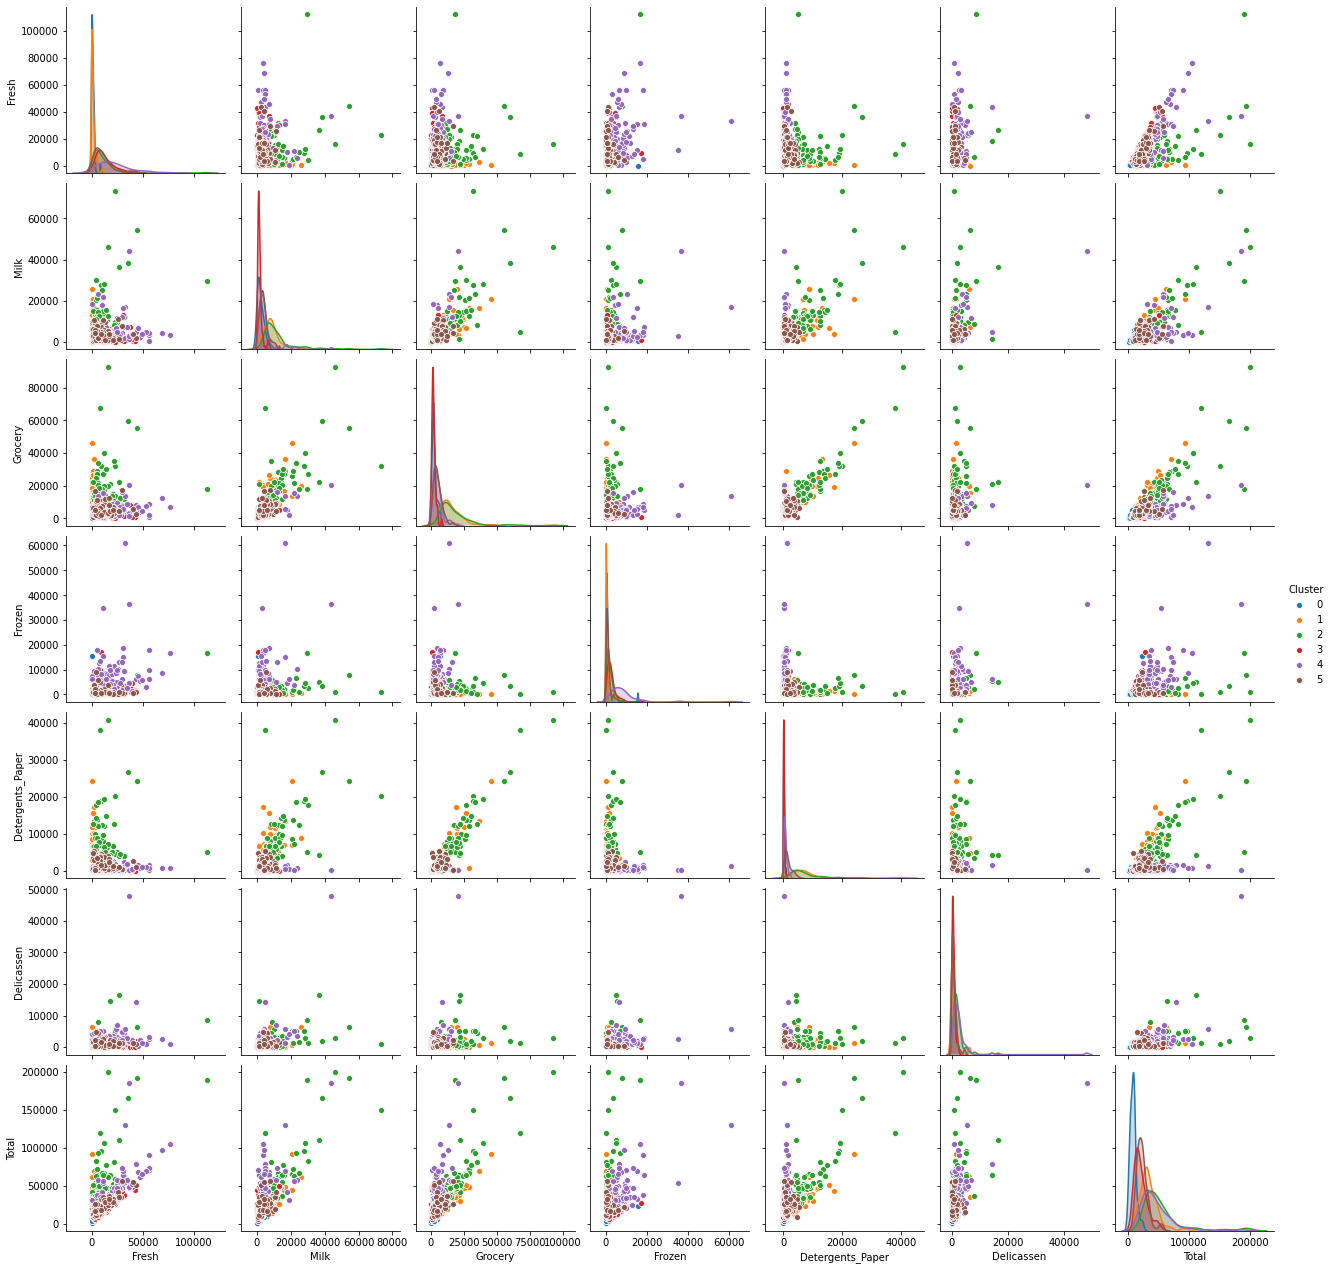

In [69]:
sns.pairplot(df_plot, hue="Cluster")

In [70]:
df_plot[['Cluster','Fresh']].groupby(['Cluster']).count()

,Fresh
Cluster,
0,32
1,47
2,88
3,116
4,77
5,80


In [77]:
cluster_columns = ['Channel', 'Region']
df_plot[cluster_columns] = df_all[cluster_columns]

- クラスタ別の購入金額

In [78]:
df_plot.drop(['Region','Channel'],axis=1).groupby('Cluster').sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Cluster,,,,,,,
0,44775.0,71079.0,84491.0,37436.0,7520.0,23326.0,268627.0
1,72902.0,412830.0,725560.0,27261.0,329916.0,43477.0,1611946.0
2,1040237.0,1127362.0,1616508.0,192047.0,714055.0,219249.0,4909458.0
3,1574218.0,200580.0,245340.0,313114.0,27640.0,80610.0,2441502.0
4,1733184.0,424322.0,400677.0,682431.0,55235.0,233098.0,3528947.0
5,814815.0,314184.0,425986.0,99361.0,133491.0,71183.0,1859020.0


In [79]:
df_cluster = df_plot.drop(['Region','Channel'],axis=1).groupby('Cluster').sum()
df_cluster['Customer'] = df_plot[['Cluster','Fresh']].groupby(['Cluster']).count()

In [80]:
df_cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Customer
Cluster,,,,,,,,
0,44775.0,71079.0,84491.0,37436.0,7520.0,23326.0,268627.0,32
1,72902.0,412830.0,725560.0,27261.0,329916.0,43477.0,1611946.0,47
2,1040237.0,1127362.0,1616508.0,192047.0,714055.0,219249.0,4909458.0,88
3,1574218.0,200580.0,245340.0,313114.0,27640.0,80610.0,2441502.0,116
4,1733184.0,424322.0,400677.0,682431.0,55235.0,233098.0,3528947.0,77
5,814815.0,314184.0,425986.0,99361.0,133491.0,71183.0,1859020.0,80


In [87]:
df_cluster_3 = df_plot[df_plot['Cluster']==2]
df_cluster_3[['Region','Channel','Fresh']].groupby(['Region','Channel']).count()

Fresh
Region Channel       
1      1            3
       2           11
2      2           10
3      1            5
       2           59

- クラスタリング分析の観点からすると、クラスタ2の層がターゲットとなるものと考えられる。\
購入金額の合計が最大であり、顧客数も全体の23%を占めているためである。\
クラスタ2のGroceryに閉める割合は最大であり、狙い目になるものと考えられる。\
Groceryに力を入れる事により、相関係数の観点からDetergents_Paperの購入金額も底上げされる。\
pairplotにおいて、Grocery及びDetergents_Paper間の購入金額が大きい層はクラスタ2が属しており、\
かつ、Channelとしては小売であるものと考えられる。Regionの観点からは、その他の地域に属しているものと考えられる。

### 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。


- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット

について記述してください。

__追々理解していこうと考えておりますが、ネットから簡単に拾える情報を出典する__

<DBSCANのメリット・デメリット>\
出典:[scikit-learnでDBSCAN(クラスタリング)](https://qiita.com/takechanman1228/items/c7f23873c087630bab18)

メリット
- k-meansと違って，最初にクラスタ数を決めなくてよい
- とがったクラスタでも分類できる。クラスタが球状であることを前提としない
- outlierに対してrobustである。
- パラメータがεとminPtsという二つでよい。また，パラメータの範囲も判断しやすい。

デメリット
- border点の概念が微妙で，データによりどのクラスタに属するか変わる可能性がある。
- 距離の計算方法により，精度が変わる。
- データが密集していると適切にεとminPtsを決めるのが難しい。ほとんどの点を一つのクラスタに分類してしまう場合も
- データがわからないとεを決めるのが難しい。
- (DBSCANに限った問題ではないが)次元が大きくなると次元の呪いの影響を受ける


<t-SNE、LLEのメリット・デメリット>\
出典:[t-SNE](https://www.slideshare.net/TakayukiYagi1/tsne)

メリット
- 

デメリット
- t-SNEは２次元もしくは３次元の次元圧縮には有効であるが、\
　それ以上の次元には計算コストの都合上現実的ではない。\
 （4次元以上の場合は、別の手法を使用する。）

出典:[Dimensionality Reduction Algorithms](http://research.iac.es/winterschool/2018/media/slides/baron_dimensionality_reduction.pdf)

< tSNE >\
Advantages:
- Can take as an input a general distance matrix.
- Non-linear embedding.
- Preserves high-dimensional clustering well (depending on the chosen perplexity).

Disadvantages:
- No prototypes.
- Sensitive to distance scales < perplexity.
- Large distances are meaningless. 

出典:[Nonlinear Dimensionality
Reduction](https://www.cs.ubc.ca/~tmm/courses/533-07/slides/hidim.donovan-4x4.pdf)

< LLE >
Advantages:
- More accurate in preserving local structure than ISOMAP
- Less computationally expensive than ISOMAP

Disadvantages:
- Less accurate in preserving global structure than ISOMAP
- Known to have difficulty on non-convex manifolds (not true of ISOMAP)

### 【問題14】（アドバンス課題）t-SNEとDBSCANの利用

Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。


[sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)


[sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)


《パラメーターチューニング》


これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。


[t-SNEの論文](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)


[DBSCANの論文](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)

__問いておりません。__